# Reading Datasets

In [60]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

In [59]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data_3 = pd.read_csv('Data_Class_3.csv')
data_5 = pd.read_csv('Data_Class_5.csv')
data_6 = pd.read_csv('Data_Class_6.csv')

df = pd.concat([data_3, data_5, data_6], ignore_index=True)

df.head(20)
df.shape
df.describe()

# show the first 10 lines od the dataset
print(df.head(10))

# Information about dataset dimension
print(df.shape)

# Descriptive statistics of the numerical columns
print(df.describe())

# Checking data types and potential missing values (NaN)
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

print(df_info)

# Set the style for the visualizations
sns.set_theme(style="whitegrid")

      Id  Altitude  Slope_Orientation  Slope  Horizontal_Distance_To_Water  \
0   6828      2499                 55     22                           390   
1   1891      2092                262     17                           309   
2  14113      2837                106     20                           638   
3   4725      2298                308     37                           127   
4  14903      2604                104     30                            30   
5  13003      2319                317     23                           201   
6  11031      2506                180     21                            60   
7   7464      2698                225      7                           228   
8   8185      2751                 52     11                           108   
9   3852      2156                185     13                           330   

   Vertical_Distance_To_Water  Horizontal_Distance_To_Roadways  \
0                         136                              816   
1        

# Univariate Analysis

## Numerical Variables

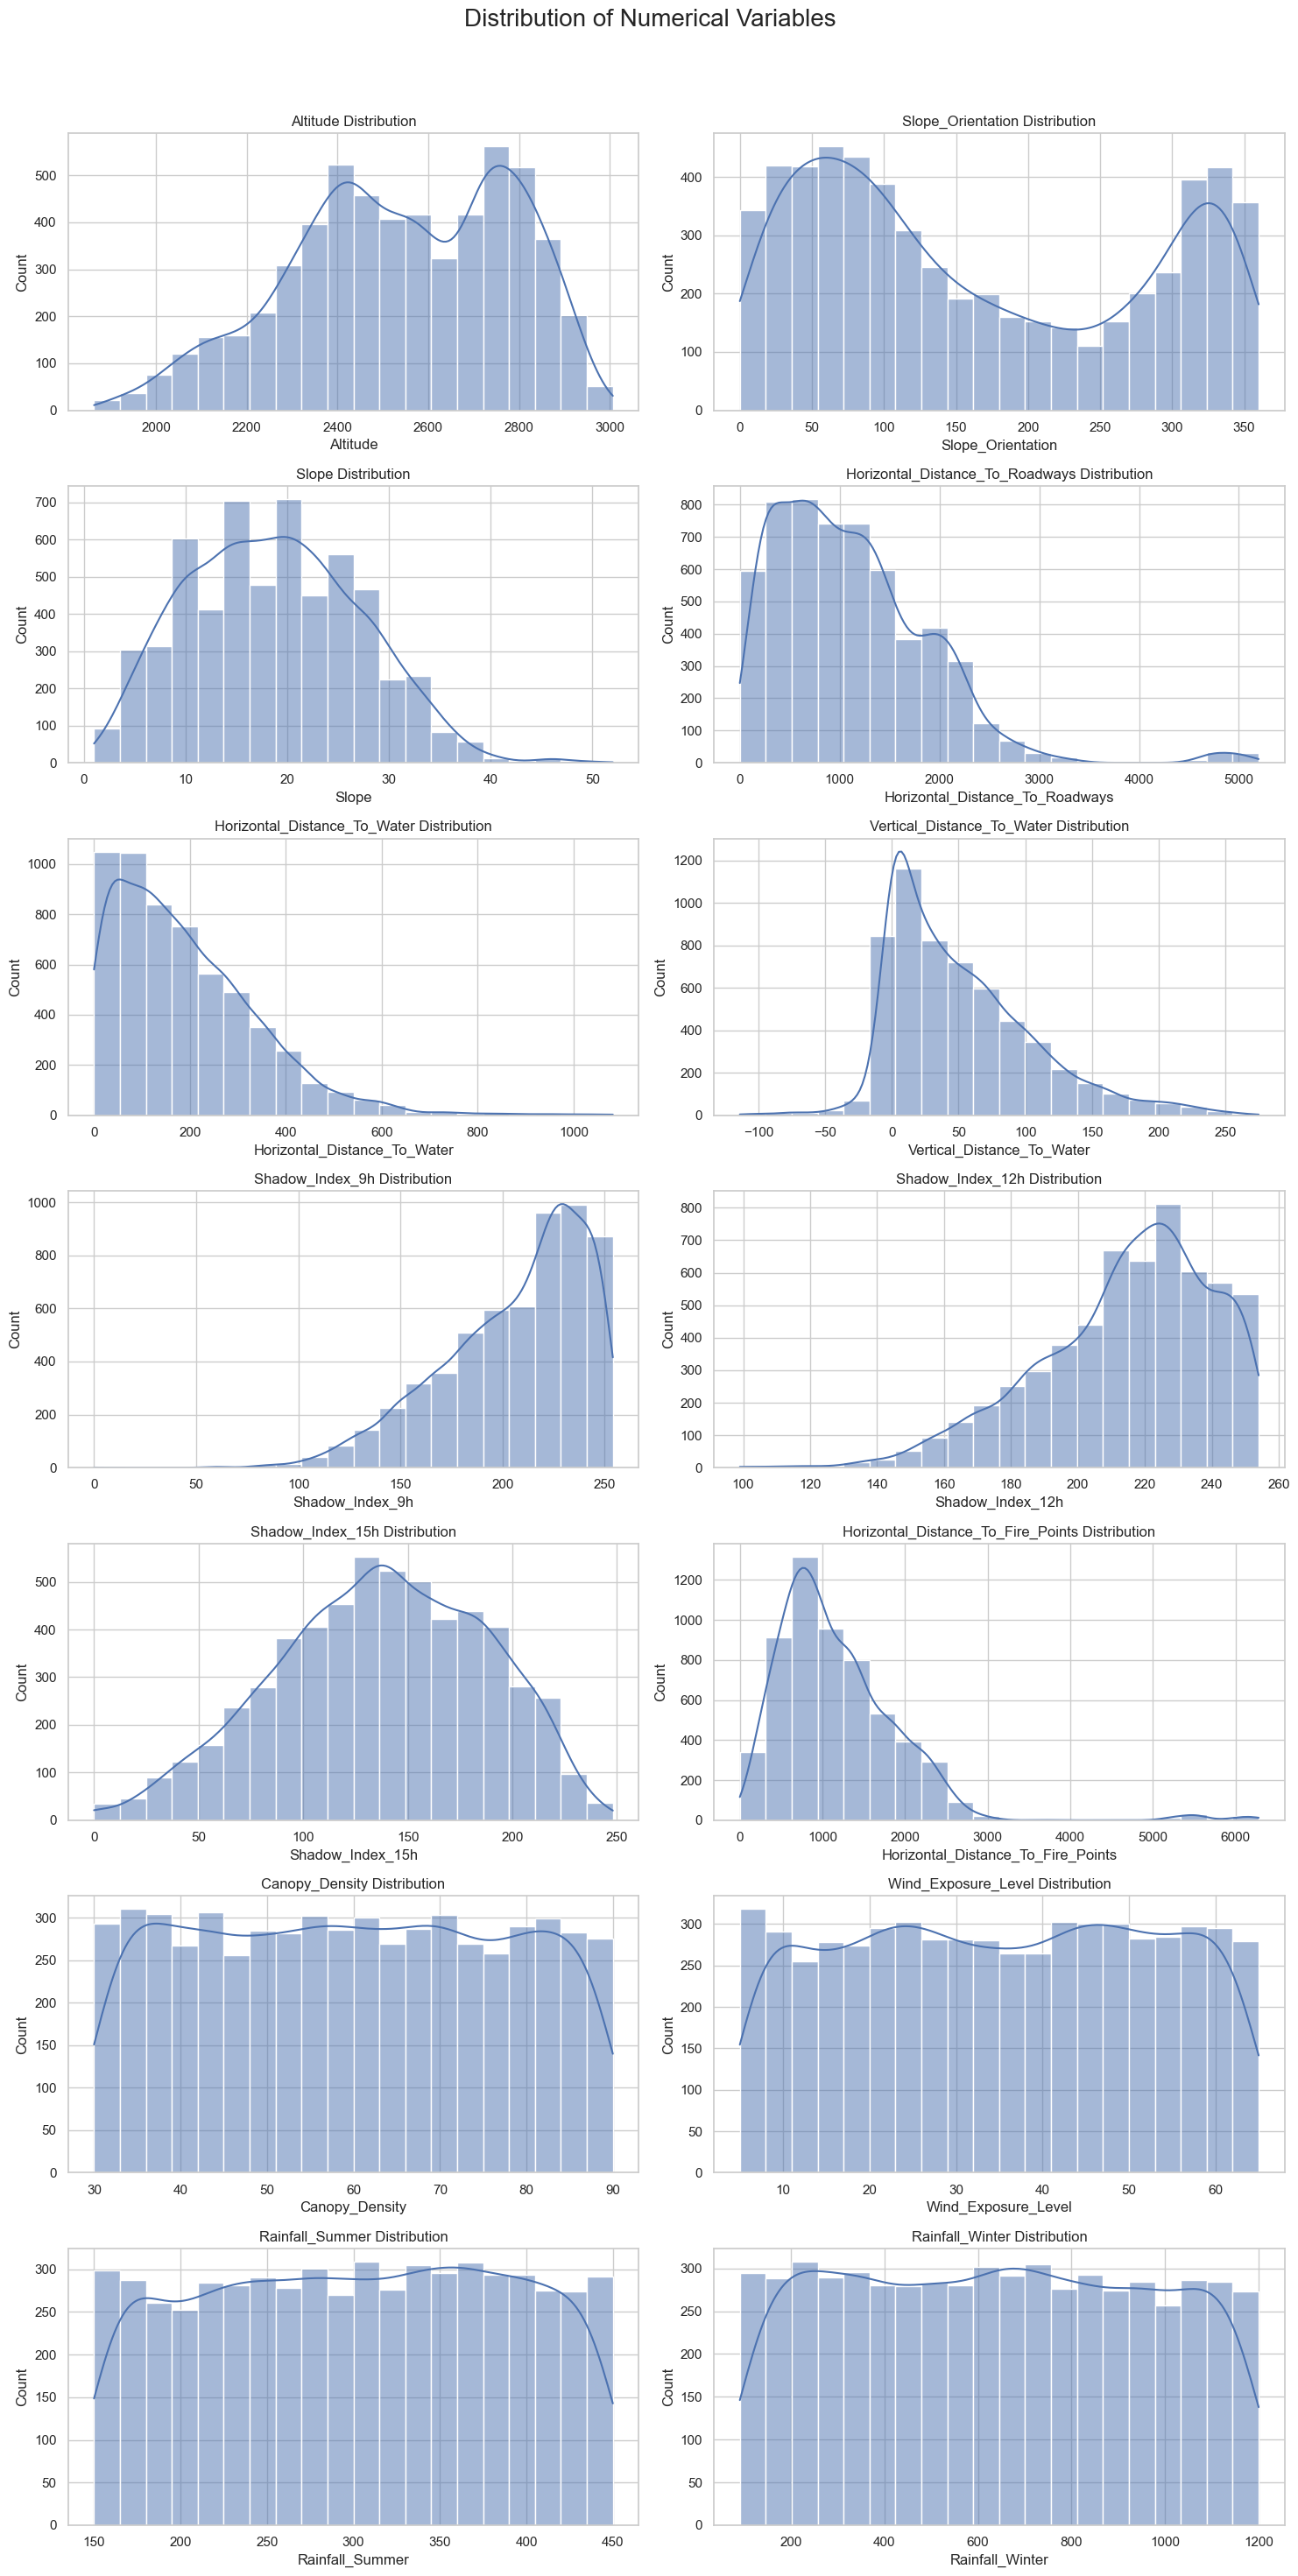

In [2]:
# Plot histograms for numerical variables
fig, axes = plt.subplots(7, 2, figsize=(15, 30))
fig.suptitle('Distribution of Numerical Variables')

sns.histplot(df['Altitude'], kde=True, bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Altitude Distribution')

sns.histplot(df['Slope_Orientation'], kde=True, bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Slope_Orientation Distribution')

sns.histplot(df['Slope'], kde=True, bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Slope Distribution')

sns.histplot(df['Horizontal_Distance_To_Roadways'], kde=True, bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Horizontal_Distance_To_Roadways Distribution')

sns.histplot(df['Horizontal_Distance_To_Water'], kde=True, bins=20, ax=axes[2, 0])
axes[2, 0].set_title('Horizontal_Distance_To_Water Distribution')

sns.histplot(df['Vertical_Distance_To_Water'], kde=True, bins=20, ax=axes[2, 1])
axes[2, 1].set_title('Vertical_Distance_To_Water Distribution')

sns.histplot(df['Shadow_Index_9h'], kde=True, bins=20, ax=axes[3, 0])
axes[3, 0].set_title('Shadow_Index_9h Distribution')

sns.histplot(df['Shadow_Index_12h'], kde=True, bins=20, ax=axes[3, 1])
axes[3, 1].set_title('Shadow_Index_12h Distribution')

sns.histplot(df['Shadow_Index_15h'], kde=True, bins=20, ax=axes[4, 0])
axes[4, 0].set_title('Shadow_Index_15h Distribution')

sns.histplot(df['Horizontal_Distance_To_Fire_Points'], kde=True, bins=20, ax=axes[4, 1])
axes[4, 1].set_title('Horizontal_Distance_To_Fire_Points Distribution')

sns.histplot(df['Canopy_Density'], kde=True, bins=20, ax=axes[5, 0])
axes[5, 0].set_title('Canopy_Density Distribution')

sns.histplot(df['Wind_Exposure_Level'], kde=True, bins=20, ax=axes[5, 1])
axes[5, 1].set_title('Wind_Exposure_Level Distribution')

sns.histplot(df['Rainfall_Summer'], kde=True, bins=20, ax=axes[6, 0])
axes[6, 0].set_title('Rainfall_Summer Distribution')

sns.histplot(df['Rainfall_Winter'], kde=True, bins=20, ax=axes[6, 1])
axes[6, 1].set_title('Rainfall_Winter Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Categorical Variables

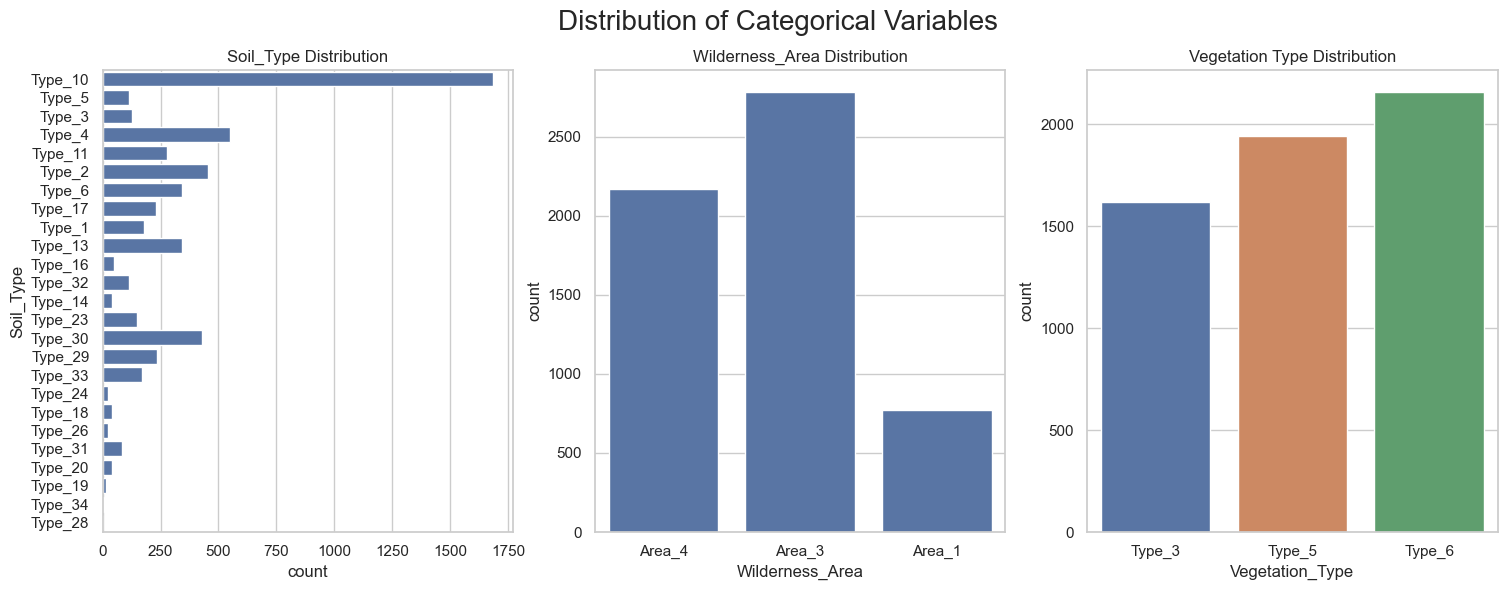

<Figure size 800x500 with 0 Axes>

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution of Categorical Variables')

sns.countplot(y='Soil_Type', data=df, ax=axes[0])
axes[0].set_title('Soil_Type Distribution')

sns.countplot(x='Wilderness_Area', data=df, ax=axes[1])
axes[1].set_title('Wilderness_Area Distribution')

sns.countplot(x='Vegetation_Type', hue='Vegetation_Type',data=df, ax=axes[2])
axes[2].set_title('Vegetation Type Distribution')
plt.show()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Correlation Matrix

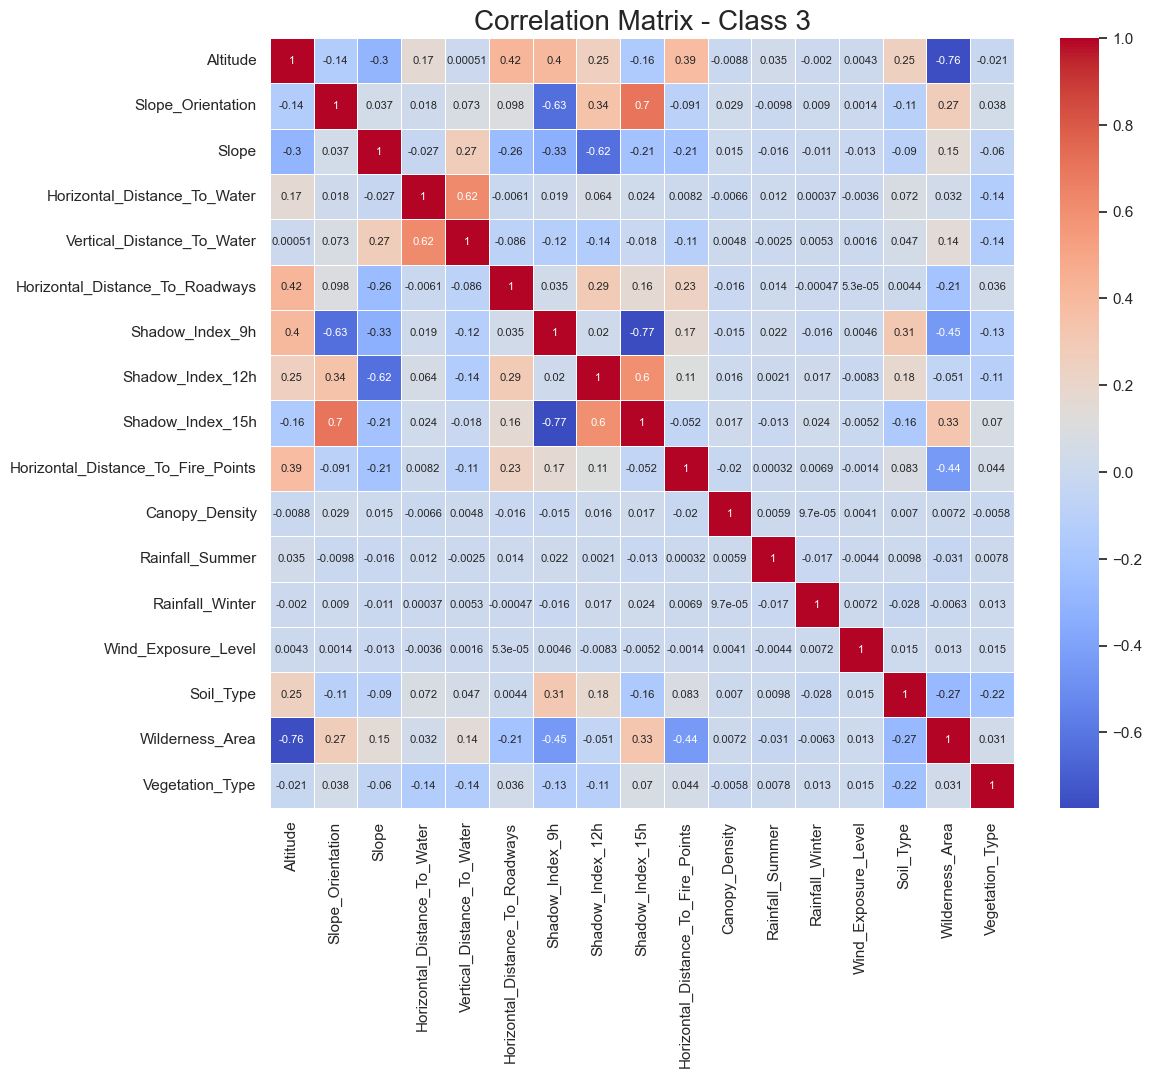

In [4]:
from sklearn.preprocessing import LabelEncoder

df_for_corr = df.copy()
df_for_corr.drop('Id', axis=1, inplace=True)

le = LabelEncoder()
categorical_columns = ['Soil_Type', 'Wilderness_Area', 'Vegetation_Type']
for col in categorical_columns:
    df_for_corr[col] = le.fit_transform(df_for_corr[col])

correlation_matrix = df_for_corr.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Matrix - Class 3", size=20)
plt.show()

# Bivariate Analysis

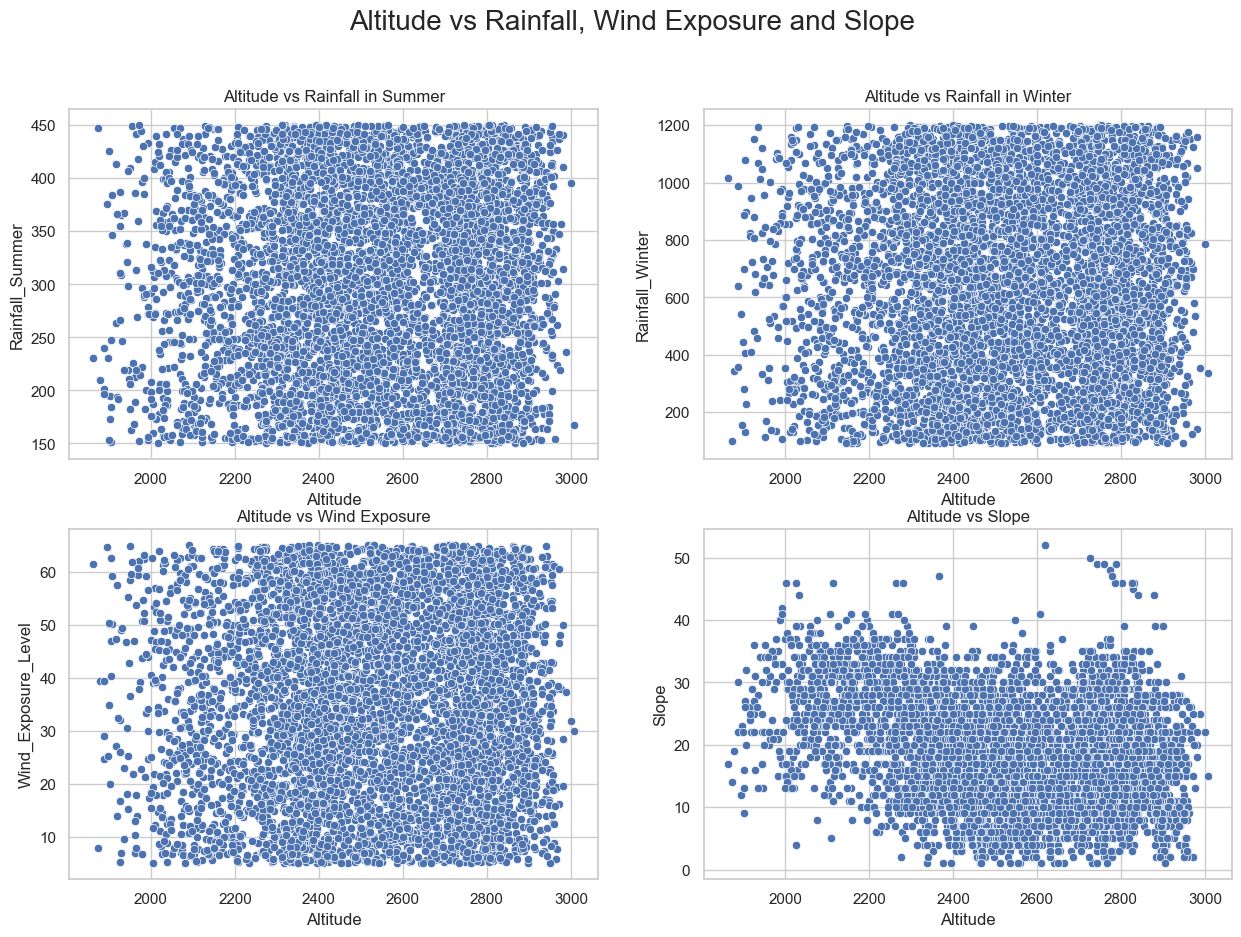

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Altitude vs Rainfall, Wind Exposure and Slope')

sns.scatterplot(x='Altitude', y='Rainfall_Summer', data=df, ax=axes[0,0])
axes[0,0].set_title('Altitude vs Rainfall in Summer')

sns.scatterplot(x='Altitude', y='Rainfall_Winter', data=df, ax=axes[0,1])
axes[0,1].set_title('Altitude vs Rainfall in Winter')

sns.scatterplot(x='Altitude', y='Wind_Exposure_Level', data=df, ax=axes[1,0])
axes[1,0].set_title('Altitude vs Wind Exposure')

sns.scatterplot(x='Altitude', y='Slope', data=df, ax=axes[1,1])
axes[1,1].set_title('Altitude vs Slope')

plt.show()

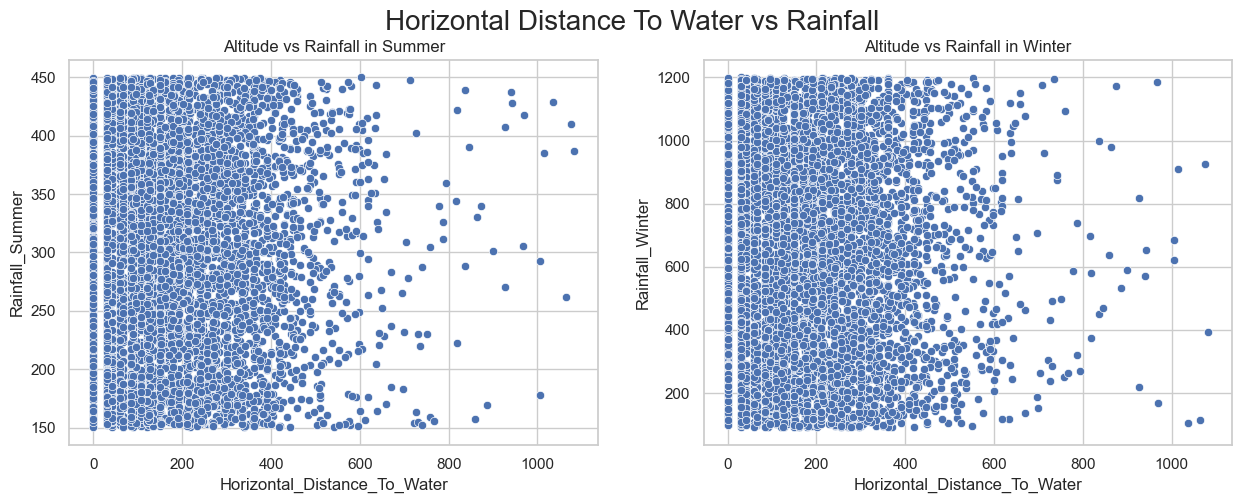

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Horizontal Distance To Water vs Rainfall')

sns.scatterplot(x='Horizontal_Distance_To_Water', y='Rainfall_Summer', data=df, ax=axes[0])
axes[0].set_title('Altitude vs Rainfall in Summer')

sns.scatterplot(x='Horizontal_Distance_To_Water', y='Rainfall_Winter', data=df, ax=axes[1])
axes[1].set_title('Altitude vs Rainfall in Winter')

plt.show()

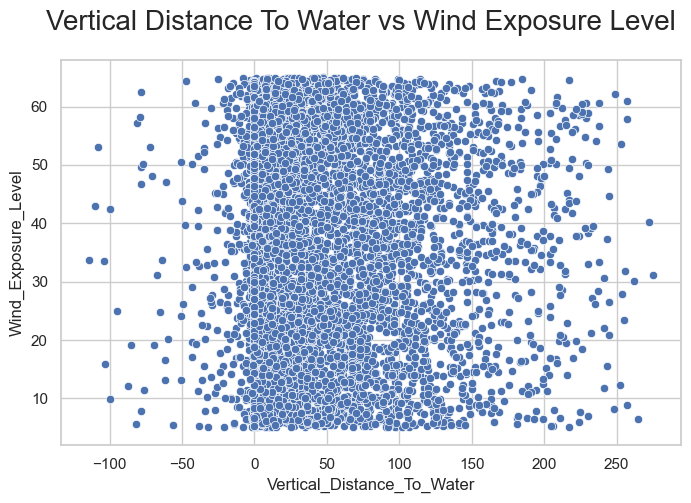

In [7]:
plt.suptitle('Vertical Distance To Water vs Wind Exposure Level')
sns.scatterplot(x='Vertical_Distance_To_Water', y='Wind_Exposure_Level', data=df)
plt.show()

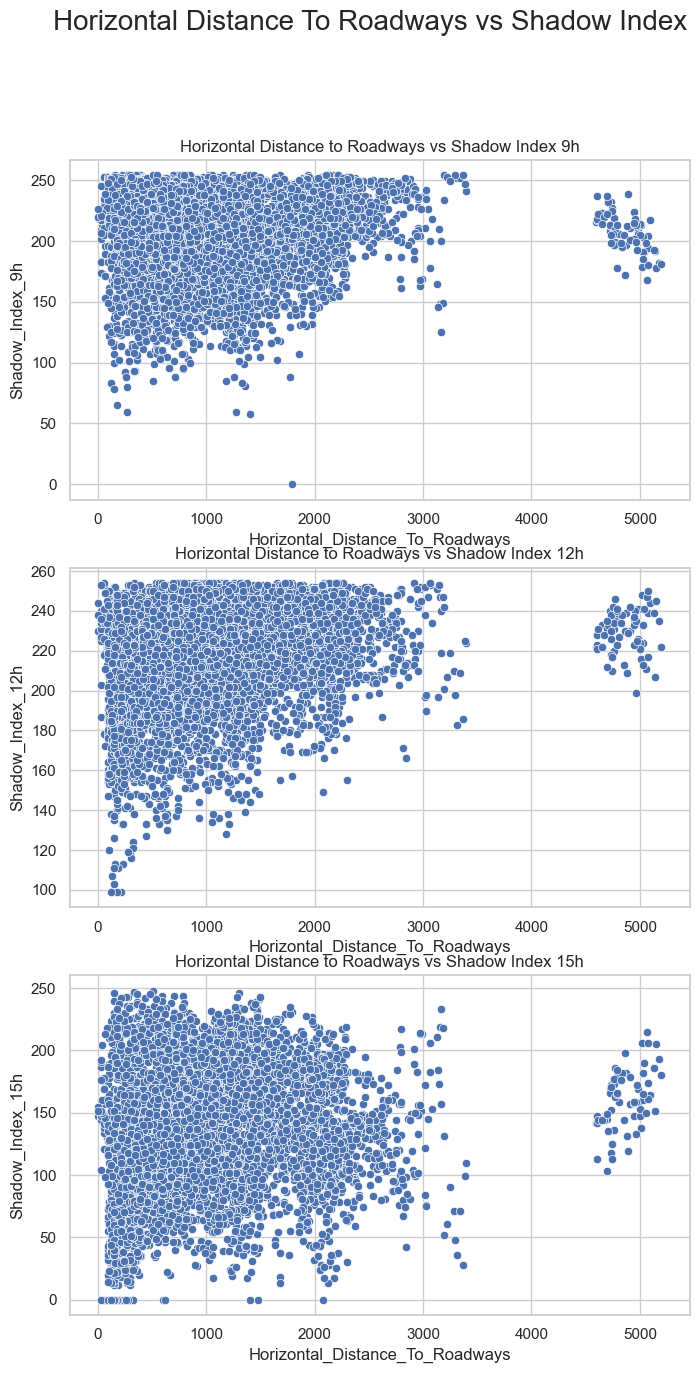

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(8, 15))
fig.suptitle('Horizontal Distance To Roadways vs Shadow Index')

sns.scatterplot(x='Horizontal_Distance_To_Roadways', y='Shadow_Index_9h', data=df, ax=axes[0])
axes[0].set_title('Horizontal Distance to Roadways vs Shadow Index 9h')

sns.scatterplot(x='Horizontal_Distance_To_Roadways', y='Shadow_Index_12h', data=df, ax=axes[1])
axes[1].set_title('Horizontal Distance to Roadways vs Shadow Index 12h')

sns.scatterplot(x='Horizontal_Distance_To_Roadways', y='Shadow_Index_15h', data=df, ax=axes[2])
axes[2].set_title('Horizontal Distance to Roadways vs Shadow Index 15h')

plt.show()

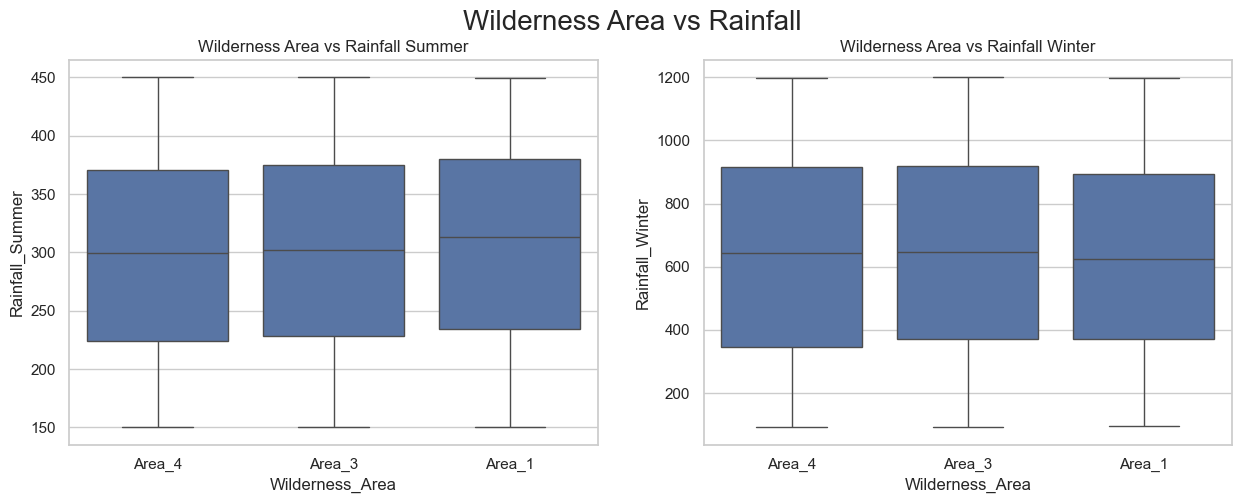

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Wilderness Area vs Rainfall')

sns.boxplot(x='Wilderness_Area', y='Rainfall_Summer', data=df, ax=axes[0])
axes[0].set_title('Wilderness Area vs Rainfall Summer')

sns.boxplot(x='Wilderness_Area', y='Rainfall_Winter', data=df, ax=axes[1])
axes[1].set_title('Wilderness Area vs Rainfall Winter')

plt.show()

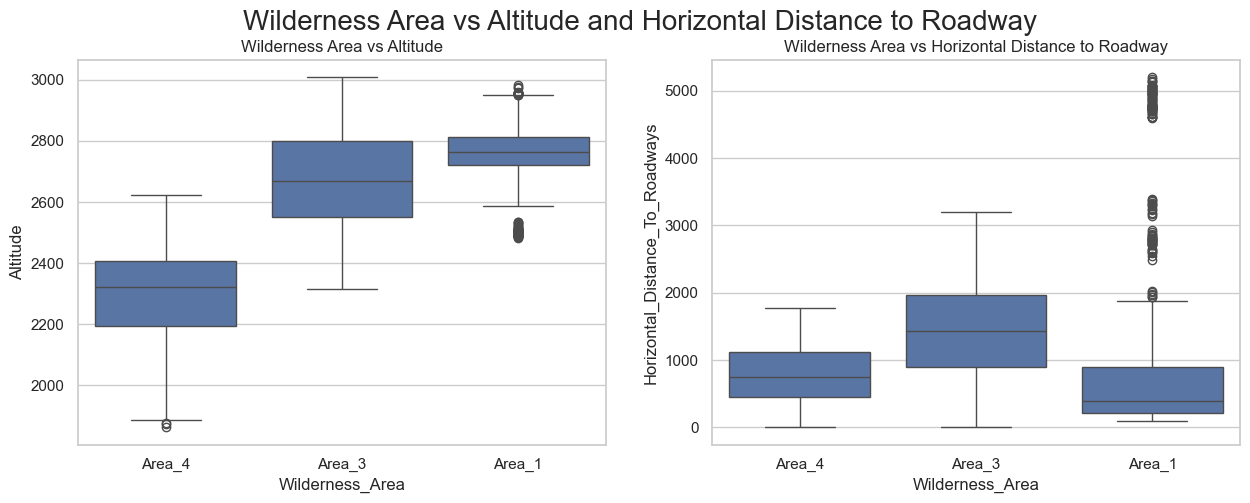

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Wilderness Area vs Altitude and Horizontal Distance to Roadway')

sns.boxplot(x='Wilderness_Area', y='Altitude', data=df, ax=axes[0])
axes[0].set_title('Wilderness Area vs Altitude')

sns.boxplot(x='Wilderness_Area', y='Horizontal_Distance_To_Roadways', data=df, ax=axes[1])
axes[1].set_title('Wilderness Area vs Horizontal Distance to Roadway')

plt.show()

<Figure size 800x500 with 0 Axes>

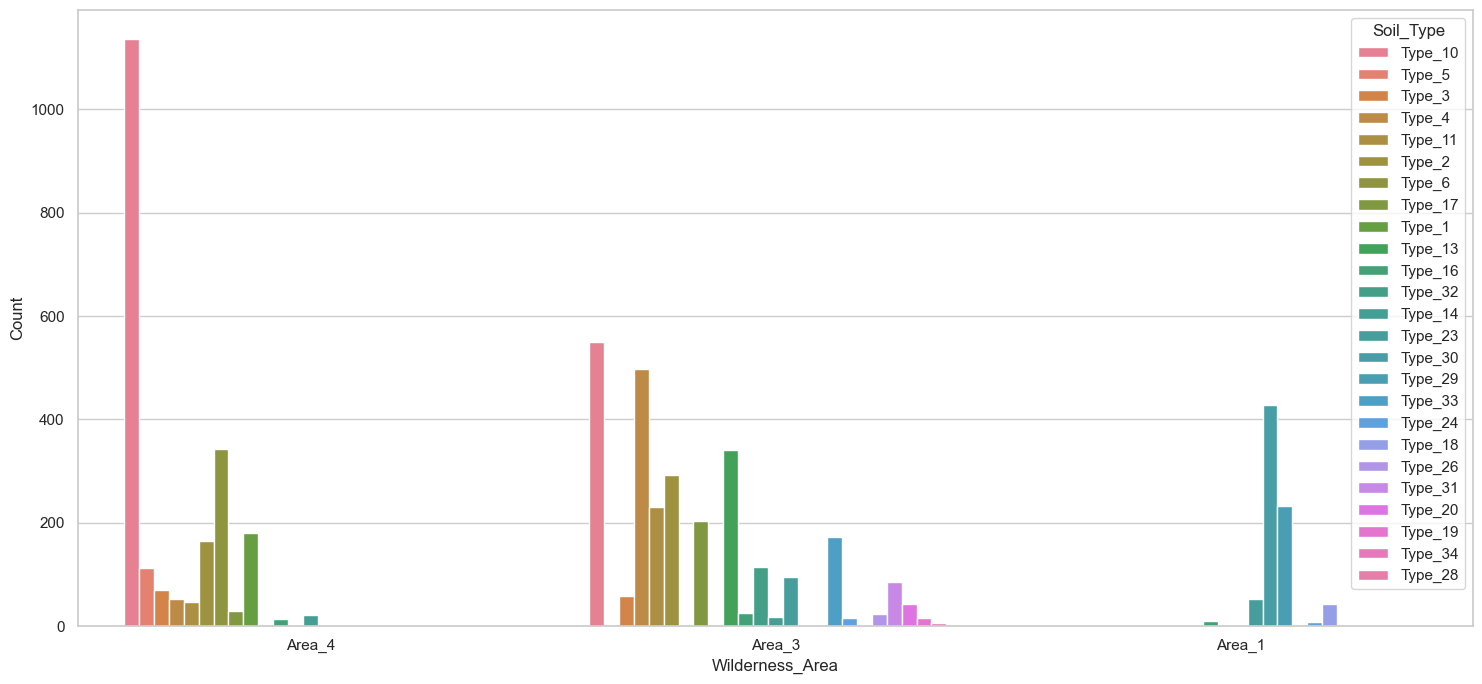

In [11]:
plt.suptitle('Countplot of Soil Types across Wilderness Areas')
plt.figure(figsize=(18, 8))
sns.countplot(x='Wilderness_Area', hue='Soil_Type', data=df)
plt.ylabel('Count')
plt.show()

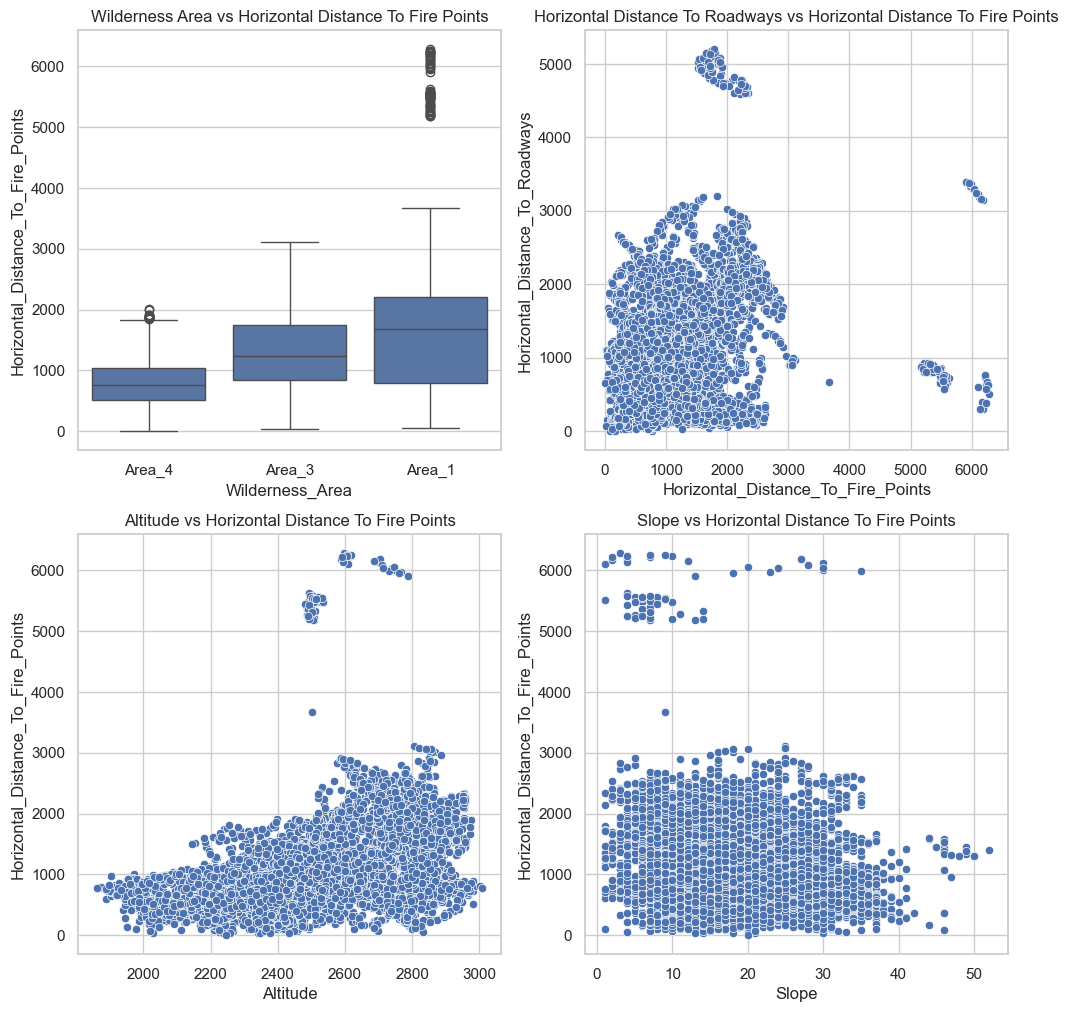

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('')

sns.boxplot(x='Wilderness_Area', y='Horizontal_Distance_To_Fire_Points', data=df, ax=axes[0,0])
axes[0,0].set_title('Wilderness Area vs Horizontal Distance To Fire Points')

sns.scatterplot(x='Horizontal_Distance_To_Fire_Points', y='Horizontal_Distance_To_Roadways', data=df, ax=axes[0,1])
axes[0,1].set_title('Horizontal Distance To Roadways vs Horizontal Distance To Fire Points')

sns.scatterplot(x='Altitude', y='Horizontal_Distance_To_Fire_Points', data=df, ax=axes[1,0])
axes[1,0].set_title('Altitude vs Horizontal Distance To Fire Points')

sns.scatterplot(x='Slope', y='Horizontal_Distance_To_Fire_Points', data=df, ax=axes[1,1])
axes[1,1].set_title('Slope vs Horizontal Distance To Fire Points')

plt.show()

Text(0.5, 1.0, 'Vegetation Type vs Horizontal Distance To Fire Points')

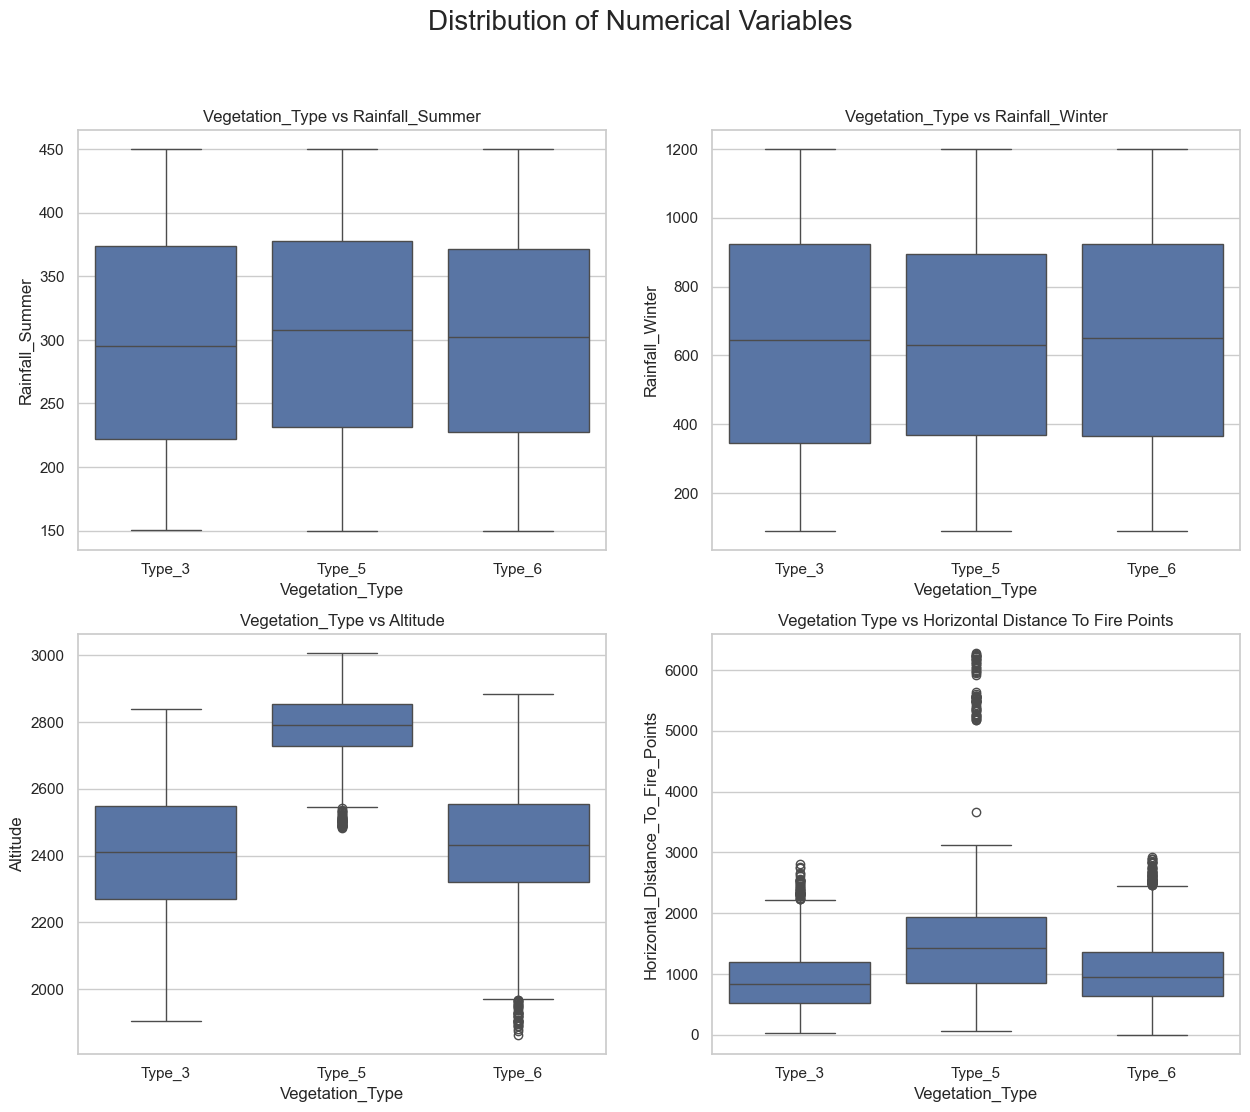

In [13]:
# Vegetation_Type vs Categorical atributes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Variables')

sns.boxplot(x='Vegetation_Type', y='Rainfall_Summer', data=df, ax=axes[0,0])
axes[0,0].set_title('Vegetation_Type vs Rainfall_Summer')

sns.boxplot(x='Vegetation_Type', y='Rainfall_Winter', data=df, ax=axes[0,1])
axes[0,1].set_title('Vegetation_Type vs Rainfall_Winter')

sns.boxplot(x='Vegetation_Type', y='Altitude', data=df, ax=axes[1,0])
axes[1,0].set_title('Vegetation_Type vs Altitude')

sns.boxplot(x='Vegetation_Type', y='Horizontal_Distance_To_Fire_Points', data=df, ax=axes[1,1])
axes[1,1].set_title('Vegetation Type vs Horizontal Distance To Fire Points')

#sns.boxplot(x='Vegetation_Type', y='Canopy_Density', data=df, ax=axes[1,1])
#axes[1,1].set_title('Vegetation_Type vs Canopy_Density')

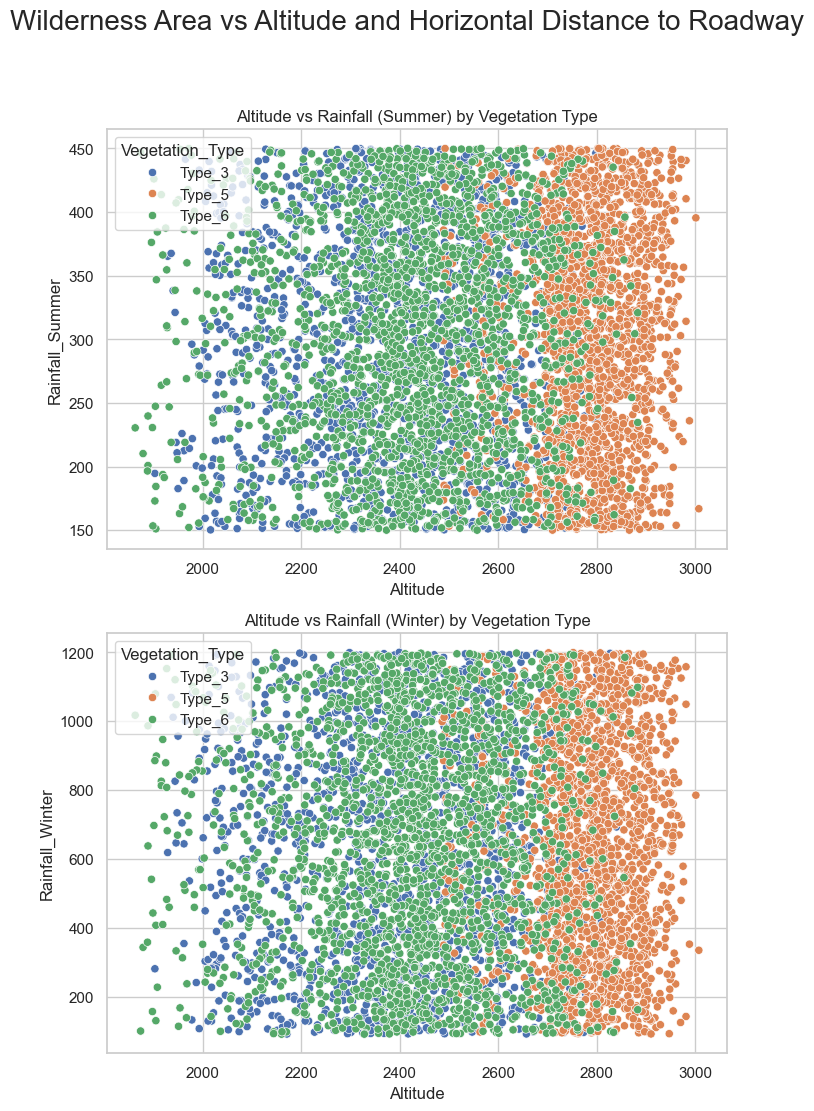

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12))
fig.suptitle('Wilderness Area vs Altitude and Horizontal Distance to Roadway')

sns.scatterplot(x='Altitude', y='Rainfall_Summer', hue='Vegetation_Type', data=df, ax=axes[0])
axes[0].set_title('Altitude vs Rainfall (Summer) by Vegetation Type')

sns.scatterplot(x='Altitude', y='Rainfall_Winter', hue='Vegetation_Type', data=df, ax=axes[1])
axes[1].set_title('Altitude vs Rainfall (Winter) by Vegetation Type')

plt.show()

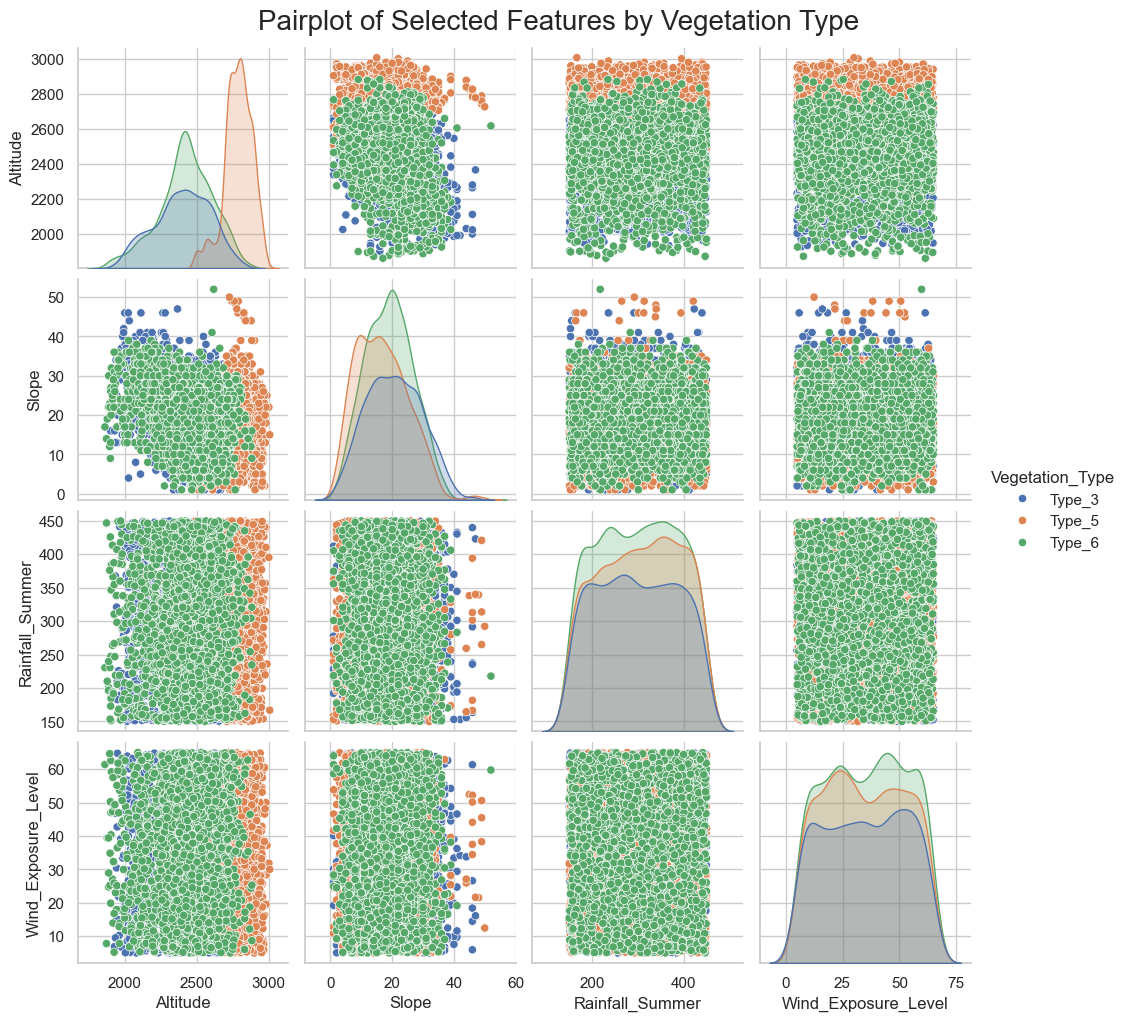

In [15]:
sns.pairplot(df[['Altitude', 'Slope', 'Rainfall_Summer', 'Wind_Exposure_Level', 'Vegetation_Type']], hue='Vegetation_Type')
plt.suptitle('Pairplot of Selected Features by Vegetation Type', y=1.02)
plt.show()

# Methods Application
## Data Preparation
### Holdout Method 

In [73]:
# Drop target variable (Vegetation_Type) and ID columns
X = df.drop(columns=['Vegetation_Type', 'Id'])  
y = df['Vegetation_Type']

# encoding 'Vegetation_Type' since it's categorical data
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Encode the Categorical Atributes
X_encoded = pd.get_dummies(X, columns=['Soil_Type', 'Wilderness_Area'])
# Scaling the features was necessary to ensure that all features have similar ranges
# otherwise the limit of TOTAL NO. of ITERATIONS was reached
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
# PCA to reduce collinearity
pca = PCA(n_components=0.85)
X_pca = pca.fit_transform(X_scaled)

# Split data into train and test sets with 80%/20% distribution (HOLDOUT METHOD)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

### Logistic Regression, LDA and QDA

In [74]:
# Predictions and evaluation
y_predicted_lr = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_predicted_lr)
print(f'Logistic Regression Accuracy (Holdout): {lr_accuracy:.8f}')

# LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predictions and evaluation
lda.fit(X_train, y_train)
y_predicted_lda = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, y_predicted_lda)
print(f'LDA Accuracy (Holdout): {lda_accuracy:.8f}')


# QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predictions and evaluation
qda.fit(X_train, y_train)
y_predicted_qda = qda.predict(X_test)
qda_accuracy = accuracy_score(y_test, y_predicted_qda)
print(f'QDA Accuracy (Holdout): {qda_accuracy:.8f}')

Logistic Regression Accuracy (Holdout): 0.76419214
LDA Accuracy (Holdout): 0.72751092
QDA Accuracy (Holdout): 0.59213974


### Cross-Validation (k = 5 and k = 10)

In [69]:
# Cross-validation with k=5
lr_crossval_5 = cross_val_score(lr, X_pca, y_encoded, cv=5)
lda_corssval_5 = cross_val_score(lda, X_pca, y_encoded, cv=5)
qda_crossval_5 = cross_val_score(qda, X_pca, y_encoded, cv=5)

print(f'Logistic Regression CV (k=5) Accuracy: {lr_crossval_5.mean():.8f}')
print(f'LDA CV (k=5) Accuracy: {lda_corssval_5.mean():.8f}')
print(f'QDA CV (k=5) Accuracy: {qda_crossval_5.mean():.8f}')

# Cross-validation with k=10
lr_crossval_10 = cross_val_score(lr, X_pca, y_encoded, cv=10)
lda_crossval_10 = cross_val_score(lda, X_pca, y_encoded, cv=10)
qda_crossval_10 = cross_val_score(qda, X_pca, y_encoded, cv=10)

print(f'Logistic Regression CV (k=10) Accuracy: {lr_crossval_10.mean():.8f}')
print(f'LDA CV (k=10) Accuracy: {lda_crossval_10.mean():.8f}')
print(f'QDA CV (k=10) Accuracy: {qda_crossval_10.mean():.8f}')


Logistic Regression CV (k=5) Accuracy: 0.71593841
LDA CV (k=5) Accuracy: 0.68886295
QDA CV (k=5) Accuracy: 0.56271781
Logistic Regression CV (k=10) Accuracy: 0.72503539
LDA CV (k=10) Accuracy: 0.68782448
QDA CV (k=10) Accuracy: 0.56656751


### Leave One Out Cross Validation

In [75]:
# Leave One Out Cross Validation
loo = LeaveOneOut()

lr_loocv = cross_val_score(lr, X_pca, y_encoded, cv=loo)
lda_loocv = cross_val_score(lda, X_pca, y_encoded, cv=loo)
qda_loocv = cross_val_score(qda, X_pca, y_encoded, cv=loo)

print(f'Logistic Regression LOOCV Accuracy: {lr_loocv.mean():.8f}')
print(f'LDA LOOCV Accuracy: {lda_loocv.mean():.8f}')
print(f'QDA LOOCV Accuracy: {qda_loocv.mean():.8f}')

Logistic Regression LOOCV Accuracy: 0.75559050
LDA LOOCV Accuracy: 0.71540881
QDA LOOCV Accuracy: 0.58280922


### Bootstrap

In [70]:
# Bootstrap function for resampling
def bootstrap_model(model, X, y, n_iterations=100):
    np.random.seed(42)
    accuracies = []
    for _ in range(n_iterations):
        # Resample with replacement
        indices = np.random.choice(range(len(X)), len(X), replace=True)
        X_resample = X[indices]
        y_resample = y[indices]
        
        # Train and evaluate the model
        model.fit(X_resample, y_resample)
        accuracy = model.score(X_resample, y_resample)
        accuracies.append(accuracy)
    
    return np.mean(accuracies)

# Bootstrap evaluation for Logistic Regression, LDA, QDA
lr_bootstrap = bootstrap_model(lr, X_pca, y_encoded)
lda_bootstrap = bootstrap_model(lda, X_pca, y_encoded)
qda_bootstrap = bootstrap_model(qda, X_pca, y_encoded)

print(f'Logistic Regression Bootstrap Accuracy: {lr_bootstrap:.8f}')
print(f'LDA Bootstrap Accuracy: {lda_bootstrap:.8f}')
print(f'QDA Bootstrap Accuracy: {qda_bootstrap:.8f}')

C:\Users\Aewir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Aewir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Aewir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Aewir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn

Logistic Regression Bootstrap Accuracy: 0.76243711
LDA Bootstrap Accuracy: 0.71662299
QDA Bootstrap Accuracy: 0.58413173
